In [1]:
import pandas as pd
import numpy as np

In [2]:
ori_data=pd.read_csv('data/all_news.csv')
print(ori_data)

                                  title  \
0     Ad sales boost Time Warner profit   
1      Dollar gains on Greenspan speech   
2     Yukos unit buyer faces loan claim   
3     High fuel prices hit BA's profits   
4     Pernod takeover talk lifts Domecq   
...                                 ...   
2220   BT program to beat dialler scams   
2221    Spam e-mails tempt net shoppers   
2222            Be careful how you code   
2223    US cyber security chief resigns   
2224   Losing yourself in online gaming   

                                                   body     topic    id  
0     Quarterly profits at US media giant TimeWarner...  business     1  
1     The dollar has hit its highest level against t...  business     2  
2     The owners of embattled Russian oil giant Yuko...  business     3  
3     British Airways has blamed high fuel prices fo...  business     4  
4     Shares in UK drinks and food firm Allied Domec...  business     5  
...                                    

In [3]:
#去除标点与分词
import re
from string import punctuation

add_punc = '.,;《》？！’ ” “”‘’@#￥% … &×（）——+【】{};；●，。&～、|\s:：'
punc = punctuation + add_punc

data_without_punc=ori_data.copy()
for i in range(len(data_without_punc.body)):
    data_without_punc.body[i]=re.sub(r"[{}]+".format(punc),' ',data_without_punc.body[i])
    
for i in range(len(data_without_punc.body)):
    data_without_punc.body[i]=data_without_punc.body[i].lower().split()

print(data_without_punc.body)


0       [quarterly, profits, at, us, media, giant, tim...
1       [the, dollar, has, hit, its, highest, level, a...
2       [the, owners, of, embattled, russian, oil, gia...
3       [british, airways, has, blamed, high, fuel, pr...
4       [shares, in, uk, drinks, and, food, firm, alli...
                              ...                        
2220    [bt, is, introducing, two, initiatives, to, he...
2221    [computer, users, across, the, world, continue...
2222    [a, new, european, directive, could, put, soft...
2223    [the, man, making, sure, us, computer, network...
2224    [online, role, playing, games, are, time, cons...
Name: body, Length: 2225, dtype: object


<ipython-input-3-0034706691ad>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_punc.body[i]=re.sub(r"[{}]+".format(punc),' ',data_without_punc.body[i])
<ipython-input-3-0034706691ad>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_punc.body[i]=data_without_punc.body[i].lower().split()


In [4]:
#去除停用词
import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
for i in range(len(data_without_punc.body)):
    for j in data_without_punc.body[i]:
        if j in stop_words:
            data_without_punc.body[i].remove(j)
data_without_stopwords=data_without_punc.copy()
print(data_without_stopwords.body)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jiananji/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       [quarterly, profits, us, media, giant, timewar...
1       [dollar, hit, highest, level, euro, almost, th...
2       [owners, embattled, russian, oil, giant, yukos...
3       [british, airways, blamed, high, fuel, prices,...
4       [shares, uk, drinks, food, firm, allied, domec...
                              ...                        
2220    [bt, introducing, two, initiatives, help, beat...
2221    [computer, users, across, world, continue, ign...
2222    [new, european, directive, could, put, softwar...
2223    [man, making, sure, us, computer, networks, sa...
2224    [online, role, playing, games, time, consuming...
Name: body, Length: 2225, dtype: object


In [5]:
#标准化
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
data_std=data_without_stopwords.copy()
for i in range(len(data_without_stopwords.body)):
    tem=[]
    for w in data_without_stopwords.body[i]: 
        word1 = wordnet_lemmatizer.lemmatize(w, pos = "n") 
        word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v") 
        word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a")) 
        #pos参数 是词性
        tem.append(word3)
    data_std.body[i].clear()
    data_std.body[i]+=tem
print(data_std.body[0])


<ipython-input-5-2ce09a07fe69>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_std.body[i]+=tem


['quarterly', 'profit', 'u', 'medium', 'giant', 'timewarner', 'jump', '76', '1', '13bn', '£600m', 'three', 'month', 'december', '639m', 'year', 'early', 'firm', 'one', 'big', 'investor', 'google', 'benefit', 'sale', 'high', 'speed', 'internet', 'connection', 'high', 'advert', 'sale', 'timewarner', 'say', 'fourth', 'quarter', 'sale', 'rise', '2', '11', '1bn', '10', '9bn', 'profit', 'buoy', 'one', 'gain', 'offset', 'profit', 'dip', 'warner', 'bros', 'le', 'user', 'aol', 'time', 'warner', 'say', 'friday', 'own', '8', 'search', 'engine', 'google', 'internet', 'business', 'aol', 'mix', 'fortune', 'lose', '464', '000', 'subscriber', 'fourth', 'quarter', 'profit', 'low', 'precede', 'three', 'quarter', 'however', 'company', 'say', 'aol', 'underlie', 'profit', 'exceptional', 'item', 'rise', '8', 'back', 'strong', 'internet', 'advertise', 'revenue', 'hope', 'increase', 'subscriber', 'offer', 'online', 'service', 'free', 'timewarner', 'internet', 'customer', 'will', 'try', 'sign', 'aol', 'exist',

In [6]:
#置入一个词表用于后续去除低频词等
vocab=[]
for l in data_std.body:
    for word in l:
        vocab.append(word)
vocabset=set(vocab)
print(len(vocab))
print(len(vocabset))


592768
22686


In [7]:
#去除低频词
from nltk.probability import *

fdist=FreqDist(vocab)
highfreq_vocab=[word for word in vocab if fdist[word]>10]
print(len(highfreq_vocab))

545171


In [8]:
#去除文章中低频词
def throwaway(x):
    return [word for word in x if fdist[word]>10]

data_std['highfreq_body']=data_std['body'].apply(throwaway)
print(data_std)
    

                                  title  \
0     Ad sales boost Time Warner profit   
1      Dollar gains on Greenspan speech   
2     Yukos unit buyer faces loan claim   
3     High fuel prices hit BA's profits   
4     Pernod takeover talk lifts Domecq   
...                                 ...   
2220   BT program to beat dialler scams   
2221    Spam e-mails tempt net shoppers   
2222            Be careful how you code   
2223    US cyber security chief resigns   
2224   Losing yourself in online gaming   

                                                   body     topic    id  \
0     [quarterly, profit, u, medium, giant, timewarn...  business     1   
1     [dollar, hit, high, level, euro, almost, three...  business     2   
2     [owner, embattle, russian, oil, giant, yukos, ...  business     3   
3     [british, airway, blame, high, fuel, price, 40...  business     4   
4     [share, uk, drink, food, firm, ally, domecq, r...  business     5   
...                              

In [9]:
#将保留的单词写入文件保存起来，并输出保留单词量
with open('vocab.txt','w') as f:
    f.write(str(highfreq_vocab))
with open('vocabset.txt','w') as f:
    f.write(str(set(highfreq_vocab)))
print(len(set(highfreq_vocab)))

5147


In [10]:
#创建文章中每种单词个数的统计字典
def builddict(x):
    return FreqDist(x)
data_std['worddict']=data_std['body'].apply(builddict)
print(data_std)

                                  title  \
0     Ad sales boost Time Warner profit   
1      Dollar gains on Greenspan speech   
2     Yukos unit buyer faces loan claim   
3     High fuel prices hit BA's profits   
4     Pernod takeover talk lifts Domecq   
...                                 ...   
2220   BT program to beat dialler scams   
2221    Spam e-mails tempt net shoppers   
2222            Be careful how you code   
2223    US cyber security chief resigns   
2224   Losing yourself in online gaming   

                                                   body     topic    id  \
0     [quarterly, profit, u, medium, giant, timewarn...  business     1   
1     [dollar, hit, high, level, euro, almost, three...  business     2   
2     [owner, embattle, russian, oil, giant, yukos, ...  business     3   
3     [british, airway, blame, high, fuel, price, 40...  business     4   
4     [share, uk, drink, food, firm, ally, domecq, r...  business     5   
...                              

In [ ]:
#计算idf前的准备：统计每种单词在几篇文章中出现
from tqdm import tqdm
mydictl=list(set(highfreq_vocab))
articlenum=len(data_std.body)
numofarticlesin={}
for word in tqdm(mydictl):
    cnt=0
    for a in data_std.body:
        if word in a:
            cnt+=1
    numofarticlesin[word]=cnt
#print(numofarticlesin)


In [12]:
#计算并创建tf-idf矩阵
from math import log

data_std['tf-idf']=[[] for i in range(articlenum)]
for ind in tqdm(range(0, articlenum)):
    temdict=data_std['worddict'][ind]
    tfidf=[]
    artlen=len(data_std.body[ind])
    for i in mydictl:
        tfidf.append(temdict[i]/artlen*(log(articlenum/(numofarticlesin[i]+1))))
    data_std['tf-idf'][ind]=tfidf
    

  0%|          | 0/2225 [00:00<?, ?it/s]<ipython-input-12-23a419a8d982>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_std['tf-idf'][ind]=tfidf
100%|██████████| 2225/2225 [00:09<00:00, 227.00it/s]


In [13]:
display(data_std['tf-idf'])

0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.014560362226876131...
                              ...                        
2220    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2221    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2222    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005...
2223    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2224    [0.0, 0.0, 0.0, 0.0, 0.0536385945687966, 0.0, ...
Name: tf-idf, Length: 2225, dtype: object

In [14]:
#将全部dataframe写在文件中存起来
data_std['content']=ori_data.body
data_std.to_csv('middlesave.txt')
with open('wordseq.txt','w') as f:
    f.write(str(mydictl))

In [15]:
#创建tf-idf的numpy矩阵
import numpy as np
from numpy import *
mymatrix=np.matrix([l for l in data_std['tf-idf']])
print(mymatrix.shape)

(2225, 5147)


In [16]:
#将tf-idf矩阵单独保存于tfidf.txt，方便服务器直接使用
savetxt('tfidf.txt',mymatrix)

In [17]:
#PCA降维
def pca(dataMat,topNfeat=4096):
    meanVals=mean(dataMat,axis=0)
    meanRemoved=dataMat-meanVals

    covMat=cov(meanRemoved,rowvar=0)
    eigVals,eigVects=linalg.eig(mat(covMat))

    eigValInd=argsort(eigVals)
    eigValInd=eigValInd[:-(topNfeat+1):-1]
    redEigVects=eigVects[:,eigValInd]
    lowDDataMat=meanRemoved*redEigVects
    reconMat=(lowDDataMat*redEigVects.T)+meanVals
    return lowDDataMat,reconMat

lowDDataMat,reconMat=pca(mymatrix,300)
print(lowDDataMat)

[[-2.29917838e-02+0.j -1.48654115e-02+0.j  2.41396855e-02+0.j ...
   4.08917653e-03+0.j -3.84180091e-03+0.j  8.42888748e-04+0.j]
 [-2.72269577e-02+0.j  9.98765169e-04+0.j  4.06066621e-03+0.j ...
   4.38677935e-05+0.j -2.34360652e-03+0.j  2.20826769e-03+0.j]
 [-4.04577359e-02+0.j -1.34209541e-03+0.j  2.46703147e-03+0.j ...
  -4.80971382e-02+0.j -1.59551602e-02+0.j -2.81628656e-02+0.j]
 ...
 [-2.02884133e-02+0.j -4.83912043e-03+0.j  2.14598706e-03+0.j ...
  -6.71179320e-04+0.j -4.80790411e-03+0.j  7.82593188e-03+0.j]
 [-2.73827137e-02+0.j -1.41005328e-02+0.j  1.42830220e-02+0.j ...
   8.82879717e-03+0.j  5.62937543e-04+0.j -1.47848562e-02+0.j]
 [ 1.15883151e-02+0.j  8.44551045e-03+0.j  9.72297997e-03+0.j ...
  -3.78734159e-03+0.j  7.27203367e-04+0.j  1.48913928e-03+0.j]]


In [18]:
print(abs(lowDDataMat))

[[2.29917838e-02 1.48654115e-02 2.41396855e-02 ... 4.08917653e-03
  3.84180091e-03 8.42888748e-04]
 [2.72269577e-02 9.98765169e-04 4.06066621e-03 ... 4.38677935e-05
  2.34360652e-03 2.20826769e-03]
 [4.04577359e-02 1.34209541e-03 2.46703147e-03 ... 4.80971382e-02
  1.59551602e-02 2.81628656e-02]
 ...
 [2.02884133e-02 4.83912043e-03 2.14598706e-03 ... 6.71179320e-04
  4.80790411e-03 7.82593188e-03]
 [2.73827137e-02 1.41005328e-02 1.42830220e-02 ... 8.82879717e-03
  5.62937543e-04 1.47848562e-02]
 [1.15883151e-02 8.44551045e-03 9.72297997e-03 ... 3.78734159e-03
  7.27203367e-04 1.48913928e-03]]


In [19]:
#聚类和纯度检验
from sklearn import datasets, preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift
from matplotlib import pyplot as plt

In [20]:
colord={'business':0,'entertainment':1,'politics':2,'sport':3,
'tech':4}
def funccolor(x):
    return colord[x]
data_std['topicno']=data_std['topic'].apply(funccolor)
featuresm=abs(lowDDataMat)
X_std = preprocessing.scale(featuresm) # 数据标准化

In [21]:
pca300d = PCA(n_components=300)
X_std = preprocessing.scale(mymatrix) # 数据标准化
X_300d = pca300d.fit_transform(X_std)
print(X_300d)
Xtfidf=X_300d

[[-5.83695934  8.06945325 -3.77598858 ... -1.50334278  0.33335132
  -1.25246316]
 [-5.13104634  4.61159282 -6.47121113 ... -2.02034697  0.88302226
  -1.66135533]
 [-6.11608989  0.20205376 -4.41657541 ... -1.05951558  2.74212281
   0.36644851]
 ...
 [-3.89865788 -5.45076491  2.12775837 ... -0.73159356 -0.69781227
  -1.21600841]
 [-5.14710384 -2.34914056  2.23920975 ...  2.25369521  4.77514322
  -3.38791171]
 [ 1.88111872 -2.60654962  2.65726126 ...  0.58558067 -0.87231205
   0.61490706]]


In [172]:
#Kmeans分为5类
estimater=KMeans(n_clusters=5)
estimater.fit(Xtfidf)

KMeans(n_clusters=5)

Purity: 0.7991011235955057


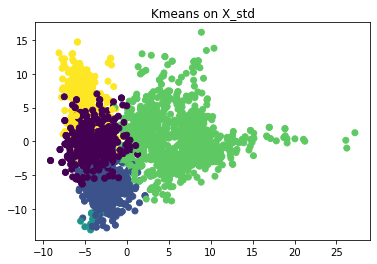

In [173]:
#计算纯度，纯度可达0.95+
def calc_purity(truth,x):
    ks=[[] for i in range(5)]
    for i in range(len(x)):
        ks[x[i]].append(truth[i])
    sum=0
    for i in range(5):
        sum+=max([ks[i].count(j) for j in range(5)])
    return sum/len(x)

X_stdl=estimater.labels_
plt.figure(1)
plt.title('Kmeans on X_std')
pca2d = PCA(n_components=2)
X_2d = pca2d.fit_transform(Xtfidf)
plt.scatter(X_2d[:,0],X_2d[:,1],c=X_stdl)
print('Purity:',calc_purity(data_std.topicno,X_stdl))


In [24]:
#计算并保存文章余弦相似度 方便HITS算法排序优化
print(Xtfidf.shape)
def cos_similarity(x):
    norm=[]
    l=len(x)
    for i in x:
        norm.append(np.linalg.norm(i))
    ans=np.zeros([l,l])
    for i in range(l):
        for j in range(l):
            ans[i][j] = np.dot(x[i],x[j])/(norm[i] * norm[j])
    return ans
cossimtable=pd.DataFrame(cos_similarity(Xtfidf), index=range(0,len(Xtfidf)),
             columns=range(len(Xtfidf)))

(2225, 300)


In [25]:
#得到余弦距离，保存在cos_distance_table.txt方便使用
cosdistance=1-cossimtable
display(cossimtable)
display(sum(sum(cosdistance<0.5)))
cosdistance.to_csv('cos_distance_table.txt')

,0,1,2,3,4,5,6,7,8,9,...,2215,2216,2217,2218,2219,2220,2221,2222,2223,2224
0,1.000000,0.063201,0.048404,0.401811,0.223269,-0.002069,0.082244,0.044505,0.023380,0.002576,...,0.210855,0.046183,0.087331,-0.029813,-0.066102,-0.027984,-0.015621,-0.047031,-0.009604,-0.110325
1,0.063201,1.000000,-0.018616,0.012828,0.028747,0.102507,0.108286,0.235317,-0.037873,0.041345,...,0.042834,-0.022453,-0.068492,-0.095273,-0.045293,-0.019313,-0.030296,0.017959,0.008834,-0.061217
2,0.048404,-0.018616,1.000000,-0.051162,0.084543,-0.032912,-0.012070,0.012935,0.002443,0.031690,...,-0.017953,-0.000496,-0.004391,0.009038,-0.024691,0.023924,-0.014264,0.009315,-0.016307,-0.066842
3,0.401811,0.012828,-0.051162,1.000000,0.079258,0.078382,0.069296,0.011947,-0.009478,-0.013413,...,0.010215,0.000633,-0.039459,-0.034865,-0.076020,0.008957,-0.024492,-0.083838,-0.050925,-0.099061
4,0.223269,0.028747,0.084543,0.079258,1.000000,-0.005847,-0.008515,0.028889,0.153325,-0.028896,...,0.024320,0.003742,-0.051209,-0.087589,-0.095596,-0.003777,0.023828,-0.038725,-0.025309,-0.130952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,-0.027984,-0.019313,0.023924,0.008957,-0.003777,-0.047293,0.012831,-0.053704,0.003903,-0.039862,...,0.160479,0.074658,0.089024,0.001508,-0.012798,1.000000,0.154963,0.108495,-0.081518,0.000863
2221,-0.015621,-0.030296,-0.014264,-0.024492,0.023828,-0.007549,-0.008082,0.024293,-0.010340,0.004912,...,0.011357,0.144478,0.001751,-0.021966,-0.083531,0.154963,1.000000,-0.010580,0.073569,0.002925
2222,-0.047031,0.017959,0.009315,-0.083838,-0.038725,0.016701,-0.016665,-0.009280,-0.014218,0.016402,...,0.000841,0.058813,0.042211,0.039407,0.099230,0.108495,-0.010580,1.000000,-0.037504,0.072791
2223,-0.009604,0.008834,-0.016307,-0.050925,-0.025309,0.010589,0.077662,-0.044902,0.007865,-0.007863,...,-0.000904,0.015360,-0.000202,-0.056394,-0.021745,-0.081518,0.073569,-0.037504,1.000000,-0.030058


10725

In [174]:
#余弦距离小于0.5认为相似
sim_05=cosdistance<0.5
sim_article={}
indexl=np.array([i for i in range(2225)])
for i in tqdm(range(2225)):
    sim_article[i]=list(indexl[sim_05[i]])
#print(sim_article)
with open('sim_article_05.txt','w') as f:
    f.write(str(sim_article))


100%|██████████| 2225/2225 [00:00<00:00, 17042.85it/s]


In [175]:
#使用tfidf矩阵的转置构建词向量并降维
wordvec=mymatrix.T
print(wordvec.shape)
pca300d = PCA(n_components=300)
wv_std = preprocessing.scale(wordvec) # 数据标准化
w_300d = pca300d.fit_transform(wv_std)
print(w_300d.shape)

(5147, 2225)
(5147, 300)


In [176]:
#得到词相似表
wordcossimtable=pd.DataFrame(cos_similarity(w_300d), index=mydictl,
             columns=mydictl)

In [177]:
#得到词向量余弦距离表
worddistable=1-wordcossimtable
display(worddistable)

,climate,thrill,teach,finally,game,scotland,unacceptable,pension,click,brown,...,martinez,albeit,indonesia,tricky,stade,eligible,agency,respond,closely,obtain
climate,2.220446e-16,1.025358e+00,1.042978e+00,1.009746,1.071413,0.945361,1.063719,1.021029,1.039992,0.967647,...,1.017734,0.972655,1.011944,0.989000,1.016401,0.958940,0.881214,1.024230e+00,0.996979,9.562377e-01
thrill,1.025358e+00,1.110223e-16,9.688585e-01,0.855302,1.020034,1.115470,0.909270,1.027648,0.894590,1.104163,...,0.869150,0.904976,1.022839,0.684811,0.984667,0.907973,1.092260,9.615053e-01,1.025093,9.315894e-01
teach,1.042978e+00,9.688585e-01,2.220446e-16,1.011281,0.888522,1.024513,1.033284,1.035522,1.003295,1.067976,...,0.983591,0.961190,0.998971,0.750166,0.974355,0.988025,1.068196,1.016031e+00,0.888734,9.474358e-01
finally,1.009746e+00,8.553024e-01,1.011281e+00,0.000000,1.060549,1.035513,0.939943,1.003786,1.048922,1.001210,...,0.943685,1.011499,0.979990,0.935246,0.984411,0.989688,1.036386,9.542421e-01,1.000375,1.097633e+00
game,1.071413e+00,1.020034e+00,8.885216e-01,1.060549,0.000000,0.872277,1.089403,1.020640,0.992947,1.016107,...,1.005926,1.183664,1.041344,1.091442,0.974551,1.133185,1.030375,9.554660e-01,0.988274,1.112459e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eligible,9.589397e-01,9.079731e-01,9.880247e-01,0.989688,1.133185,1.030409,0.927537,1.054319,0.963352,1.080294,...,0.943986,0.906333,1.009097,0.830315,1.001372,0.000000,1.065602,9.824906e-01,0.974573,8.932537e-01
agency,8.812139e-01,1.092260e+00,1.068196e+00,1.036386,1.030375,0.958691,0.989266,0.813813,0.944782,1.014080,...,1.031714,1.061484,0.865095,1.129786,1.023649,1.065602,0.000000,9.295112e-01,1.021507,9.144350e-01
respond,1.024230e+00,9.615053e-01,1.016031e+00,0.954242,0.955466,1.071581,0.891606,0.995427,0.997774,0.880649,...,0.999208,1.019555,1.062050,0.973480,1.046109,0.982491,0.929511,2.220446e-16,1.134958,9.952842e-01
closely,9.969789e-01,1.025093e+00,8.887345e-01,1.000375,0.988274,1.032209,0.914949,0.989761,1.000815,1.022764,...,0.997012,0.956371,1.043265,0.977989,0.998850,0.974573,1.021507,1.134958e+00,0.000000,8.997545e-01


In [178]:
#选用0.39为阈值，认为小于0.39可以视为相似词，此时平均每个词有2个相似词，数量较为合理
#将相似词列表字典输出为synonym.txt，存储时按照相似程度从高到底存储
wsim_05=worddistable<0.39
sim_wordsdic={}
mydictnp=np.array(mydictl)
ave=0
for i in tqdm(mydictl):
    sim_wordsdic[i]=list(mydictnp[wsim_05[i]])
    sim_wordsdic[i].sort(key=lambda x: worddistable[i][x])
    ave+=len(mydictnp[wsim_05[i]])-1
ave=ave/len(mydictl)
print('average similiar words number is',ave)
with open('synonym.txt','w') as f:
    f.write(str(sim_wordsdic))

100%|██████████| 5147/5147 [00:01<00:00, 2810.10it/s]

average similiar words number is 2.05206916650476
